This tutorial's purpose is to introduce people to the [2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19) and how to explore it using some foundational packages in the Scientific Python Data Science stack.

It is not intended to encourage people to create & publish their own data visualizations. In fact, as [this thoughtful essay](https://medium.com/nightingale/ten-considerations-before-you-create-another-chart-about-covid-19-27d3bd691be8) makes clear, in many cases it is irresponsible to publish amateur visualizations, which at best will dilute those that experts with domain expertise are publishing. We won't be making any predictions or doing any statistical modelling, although we may look critically at some other models.

Dashboards such as these inpsired me to put this material together, in order to show people how to dive into the data:

- [Covid-19: active cases and extrapolation](https://covid19-dash.github.io/) by Gaël Varoquaux, Emmanuelle Gouillart, Russell Poldrack, and Guillaume Lemaitre
- [NYC Covid-19 data dashboard](https://smarquez.shinyapps.io/covid_nys_dashboard/) by Sue Marquez
- All of [these dashboards](https://covid19dashboards.com/) contributed to by many and powered by the work of Hamel Husain.


There's also a well-known and evolving figure from the Financial Times, which is being circulated. [This](https://twitter.com/DrDenaGrayson/status/1241143463925645319/photo/1) is an example from several weeks ago.

But be careful when interpreting plots, numbers, and reports of the *known* number of cases of COVID-19 <-- this is a function of many things that are *not* the total number of cases, such as the number of available tests. The limiting case is when there are zero tests, there are zero known cases; then if many tests become available, there'll seem to be a huge spike in number of cases, even if there hasn't been such a spike. The number of reported known cases is also a function of any given government's willingness (or lakc thereof) to report their actual findings. We can think of this in relation to NNT's conception of [Wittgenstein's ruler](https://twitter.com/DellAnnaLuca/status/1244555177807380480).

We'll be visualizing number of known cases, number of deaths, and number of recoveries around the world. Note that there are interesting ways to report these numbers that aren't quite visualization per se. Ryan Struyck of CNN, for example, has been leveraging the affordances of tweets and twitter do display such data compellingly:

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Reported US coronavirus cases<br><br>3/17: 6,135<br>3/18: 8,760<br>3/19: 13,229<br>3/20: 18,763<br>3/21: 25,740<br>3/22: 34,276<br>3/23: 42,663<br>3/24: 52,976<br>3/25: 65,273<br>3/26: 82,135<br>3/27: 101,295<br>3/28: 121,176<br>3/29: 139,773<br>3/30: 160,377<br>3/31: 185,469<br>4/1: 211,740<br>4/2: 245,070<br>4/3: 277,953<br>Now: 311,544</p>&mdash; Ryan Struyk (@ryanstruyk) <a href="https://twitter.com/ryanstruyk/status/1246624017278263296?ref_src=twsrc%5Etfw">April 5, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

**Discuss:** We're about to dive into the dataset, but first let's chat a bit about why we're looking at the Hopkins dataset and what other options could.

## GET THE DATA

First thing's first. Let's import the necessary packages from the SciPy stack and get [that data](https://github.com/CSSEGISandData/COVID-19).

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set style & figures inline
sns.set()
%matplotlib inline

In [2]:
# Data urls
confirmed_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
death_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovery_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

# Import datasets as pandas dataframes
raw_data_confirmed = pd.read_csv(confirmed_cases_data_url)
raw_data_deaths = pd.read_csv(death_cases_data_url)
raw_data_recovered = pd.read_csv(recovery_cases_data_url)

We'll first check out the confirmed cases data by looking at the head of the dataframe:


In [3]:
raw_data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14


**Discuss:** What do you see here?
We can also see a lot about the data by using the `.info()` and `.describe()` dataframe methods:

In [4]:
raw_data_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 79 columns):
Province/State    82 non-null object
Country/Region    262 non-null object
Lat               262 non-null float64
Long              262 non-null float64
1/22/20           262 non-null int64
1/23/20           262 non-null int64
1/24/20           262 non-null int64
1/25/20           262 non-null int64
1/26/20           262 non-null int64
1/27/20           262 non-null int64
1/28/20           262 non-null int64
1/29/20           262 non-null int64
1/30/20           262 non-null int64
1/31/20           262 non-null int64
2/1/20            262 non-null int64
2/2/20            262 non-null int64
2/3/20            262 non-null int64
2/4/20            262 non-null int64
2/5/20            262 non-null int64
2/6/20            262 non-null int64
2/7/20            262 non-null int64
2/8/20            262 non-null int64
2/9/20            262 non-null int64
2/10/20           262 non-null int64
2/

In [5]:
raw_data_confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,...,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,21.419981,22.127121,2.118321,2.496183,3.591603,5.473282,8.083969,11.171756,21.290076,23.534351,...,2264.469466,2521.778626,2748.538168,2986.125954,3272.851145,3559.561069,3867.011450,4182.889313,4570.248092,4855.400763
std,24.792328,70.914947,27.486209,27.585152,34.340380,47.792307,66.787825,89.985083,220.845467,222.189584,...,10885.537733,12169.241784,13371.580281,14684.993585,16304.612296,17925.164296,19769.176892,21747.035905,24028.171891,25765.035389
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.135000,-22.036550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,10.250000,12.000000,14.250000,15.000000,18.000000,20.000000,21.250000,21.250000,22.000000
50%,23.659750,20.535638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,100.000000,111.500000,130.000000,139.000000,144.500000,170.000000,176.500000,185.000000,195.500000,214.000000
75%,41.191625,80.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,560.250000,603.500000,643.250000,687.250000,715.500000,780.500000,889.000000,955.000000,986.750000,1020.500000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,101657.000000,121478.000000,140886.000000,161807.000000,188172.000000,213372.000000,243453.000000,275586.000000,308850.000000,337072.000000


**Discuss:** What do the above tell us?

## Getting the numbers for each country

Look at the head (or tail!) of our dataframe again and notice that each row is the data for a particular *province* or *state* of a given country:

In [6]:
raw_data_confirmed.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
257,NaN,Malawi,-13.254308,34.301525,0,0,0,0,0,0,...,0,0,0,0,0,0,3,3,4,4
258,Falkland Islands (Islas Malvinas),United Kingdom,-51.796300,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


We want the numbers for each country, though! So the way to think about this is, for each country, we want to take all the rows (*regions/provinces*) that correspond to that country and add up the numbers for each. To put this in data-analytic-speak, we want to **group by** the country column and sum up all the values for the other columns.

This is a common pattern in data analysis that we humans have been using for centuries. Interestingly, it was only formalized in 2011 by Hadley Wickham in his seminal paper [The Split-Apply-Combine Strategy for Data
Analysis](https://www.jstatsoft.org/article/view/v040i01). The pattern we're discussing is now called Split-Apply-Combine and, in the case at hand, we

- Split the data into new datasets for each country,
- Apply the function of "sum" for each new dataset (that is, we add/sum up the values for each column), and
- Combine these datasets into a new dataframe.

The `pandas` API has the `groupby` method, which allows us to do this. So let's do it!

**Side note:** For more on split-apply-combine and `pandas` check out [my post here](https://www.datacamp.com/community/tutorials/pandas-split-apply-combine-groupby).

In [7]:
# Group by region (also drop 'Lat', 'Long' as it doesn't make sense to sum them here)
confirmed_country = raw_data_confirmed.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
confirmed_country.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
Albania,0,0,0,0,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
Algeria,0,0,0,0,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
Andorra,0,0,0,0,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
Angola,0,0,0,0,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14


So each row of our new dataframe `confirmed_country` is a time series of the number of confirmed cases for each country. Cool! 
Now a dataframe has an associated object called an Index, which is essentially a set of unique indentifiers for each row. Let's check out the index of `confirmed_country`:

In [8]:
confirmed_country.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Uzbekistan',
       'Venezuela', 'Vietnam', 'West Bank and Gaza', 'Western Sahara',
       'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=183)

It's indexed by `Country/Region`. That's pretty cool **but** if we index by date **instead**, it will allow us to produce some visualizations almost immediately. This is a nice aspect of the `pandas` API: you can make basic visualizations with it and, if your index consists of DateTimes, it knows that you're plotting time series and plays nicely with them.
To make the index the set of dates, notice that the column names are the dates. To turn column names into the index, we essentially want to make the columns the rows (and the rows the columns). This corresponds to taking the transpose of the dataframe:

In [9]:
confirmed_country = confirmed_country.transpose()
confirmed_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0


Let's have a peek at our index to see whether it actually consists of DateTimes:

In [10]:
confirmed_country.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20'],
      dtype='object')

Oh no! `dtype='object'` <-- this sucks: these are strings :/ But never fear! Using some wicked `pandas` foo, we can turn it into a DateTimeIndex:

In [11]:
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(confirmed_country.index)
confirmed_country.set_index(datetime_index, inplace=True)
# Check out index
confirmed_country.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

Boom! Now we have a DateTimeIndex and Countries for columns, we can use the dataframe plotting method to visualize the time series of confirmed number of cases by country. As there are so many coutries, we'll plot a subset of them:

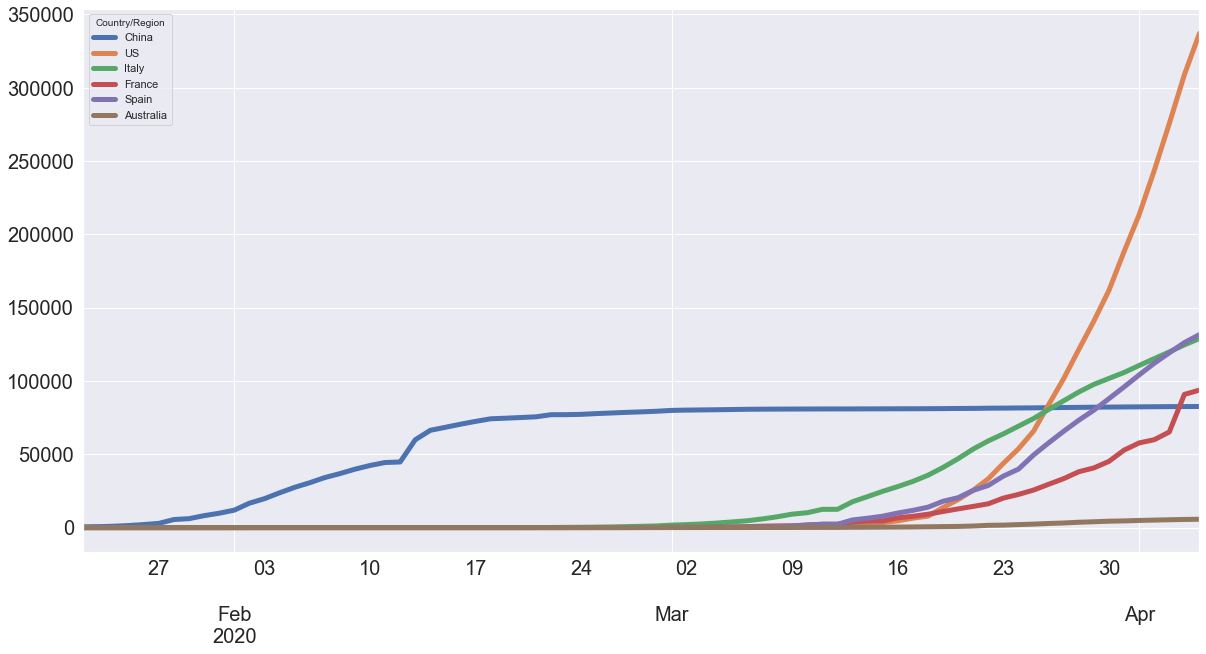

In [12]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Spain', 'Australia']
confirmed_country[poi].plot(figsize=(20,10), linewidth=5, fontsize=20);

Let's label our axes and give the figure a title:

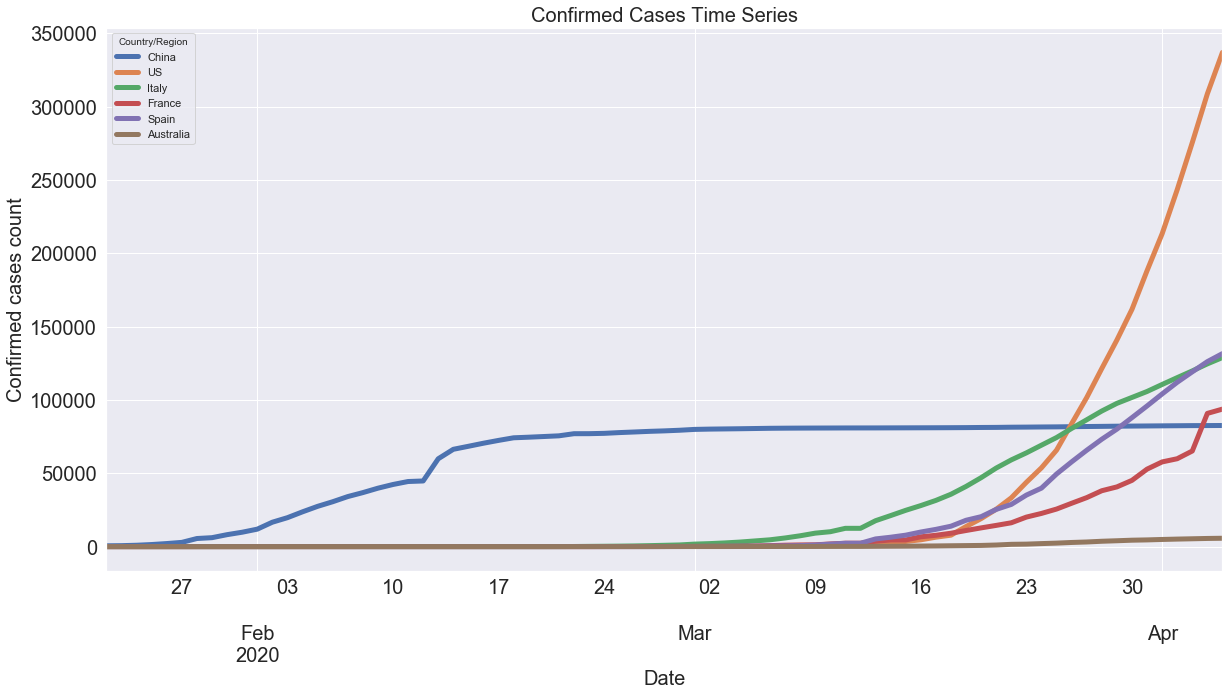

In [13]:
# Plot time series of several countries of interest
confirmed_country[poi].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Confirmed cases count', fontsize=20);
plt.title('Confirmed Cases Time Series', fontsize=20);

Let's do this again but make the y-axis logarithmic (we'll discuss why in a tick):

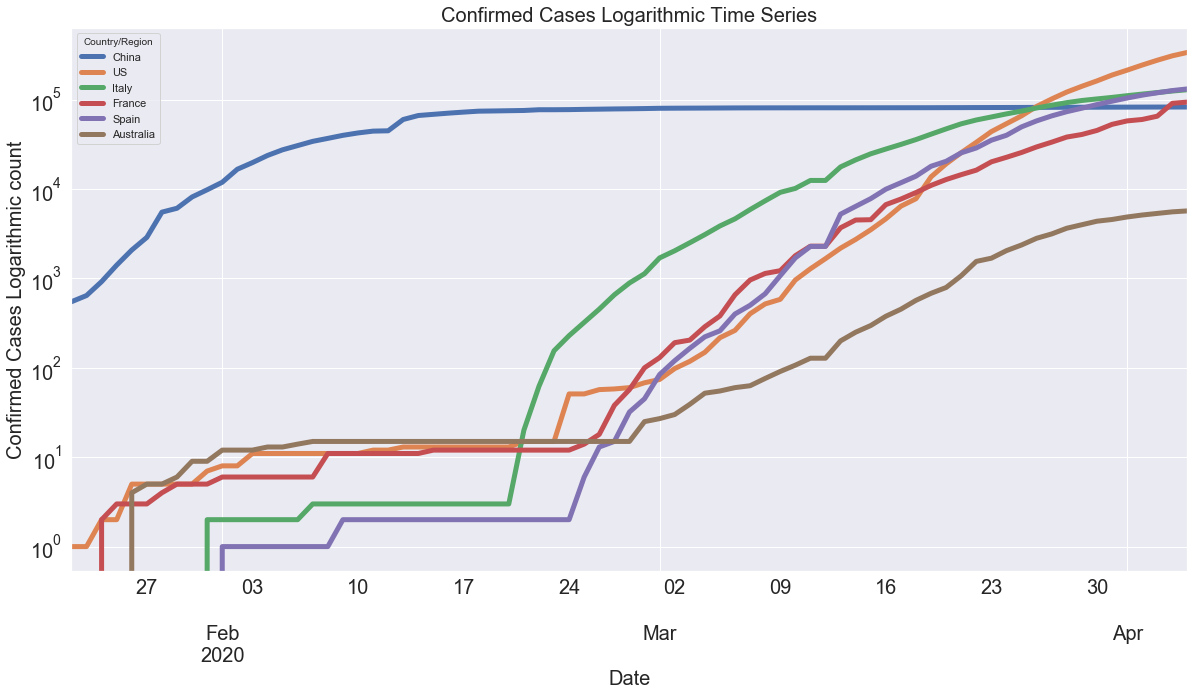

In [14]:
# Plot time series of several countries of interest
confirmed_country[poi].plot(figsize=(20,10), linewidth=5, fontsize=20, logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Confirmed Cases Logarithmic count', fontsize=20);
plt.title('Confirmed Cases Logarithmic Time Series', fontsize=20);

**Discuss:** Why do we plot with a log y-axis? How do we interpret the log plot?
**Key points:** 
- If a variable takes on values over several orders of magnitude (e.g. in the 10s, 100s, and 1000s), we use a log axes so that the data is not all crammed into a small region of the visualization.
- If a curve is approximately linear on a log axis, then its approximately exponential growth and the gradient/slope of the line tells us about the exponent.


## Number of deaths by country

As we did above for `raw_data_confirmed`, let's check out the head and the info of the `raw_data_deaths` dataframe:

In [15]:
raw_data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,4,4,4,4,4,6,6,7,7
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,8,10,10,11,15,15,16,17,20,20
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,26,29,31,35,44,58,86,105,130,152
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,3,3,6,8,12,14,15,16,17,18
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,2,2,2,2,2,2,2,2


In [16]:
raw_data_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 79 columns):
Province/State    82 non-null object
Country/Region    262 non-null object
Lat               262 non-null float64
Long              262 non-null float64
1/22/20           262 non-null int64
1/23/20           262 non-null int64
1/24/20           262 non-null int64
1/25/20           262 non-null int64
1/26/20           262 non-null int64
1/27/20           262 non-null int64
1/28/20           262 non-null int64
1/29/20           262 non-null int64
1/30/20           262 non-null int64
1/31/20           262 non-null int64
2/1/20            262 non-null int64
2/2/20            262 non-null int64
2/3/20            262 non-null int64
2/4/20            262 non-null int64
2/5/20            262 non-null int64
2/6/20            262 non-null int64
2/7/20            262 non-null int64
2/8/20            262 non-null int64
2/9/20            262 non-null int64
2/10/20           262 non-null int64
2/

It seems to be structured similarly to `raw_data_confirmed`. I have checked it out in detail and can confirm that it is! This is good data design as it means that users like can explore, munge, and visualize it in a fashion analogous to the above. Can you remember what we did? We

- Split-Apply-Combined it (and dropped 'Lat'/'Long'),
- Transposed it,
- Made the index a DateTimeIndex, and
- Visualized it (linear and semi-log).

Let's now do the first three steps here for `raw_data_deaths` and see how we go:



In [17]:
# Split-Apply-Combine
deaths_country = raw_data_deaths.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)

# Transpose
deaths_country = deaths_country.transpose()

# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(deaths_country.index)
deaths_country.set_index(datetime_index, inplace=True)

# Check out head
deaths_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Check out the index
deaths_country.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

Looks good to me. So let's do some data vis up in here:

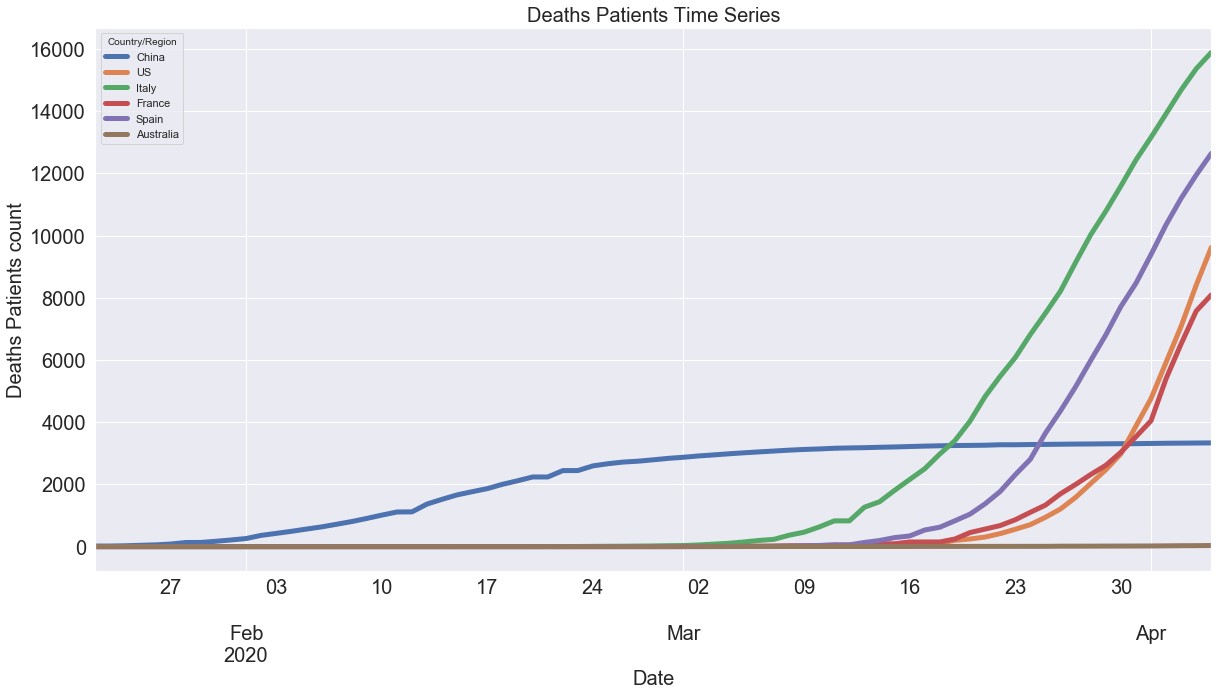

In [19]:
# Plot time series of several countries of interest
deaths_country[poi].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Deaths Patients Time Series', fontsize=20);

Now on a semi-log plot:

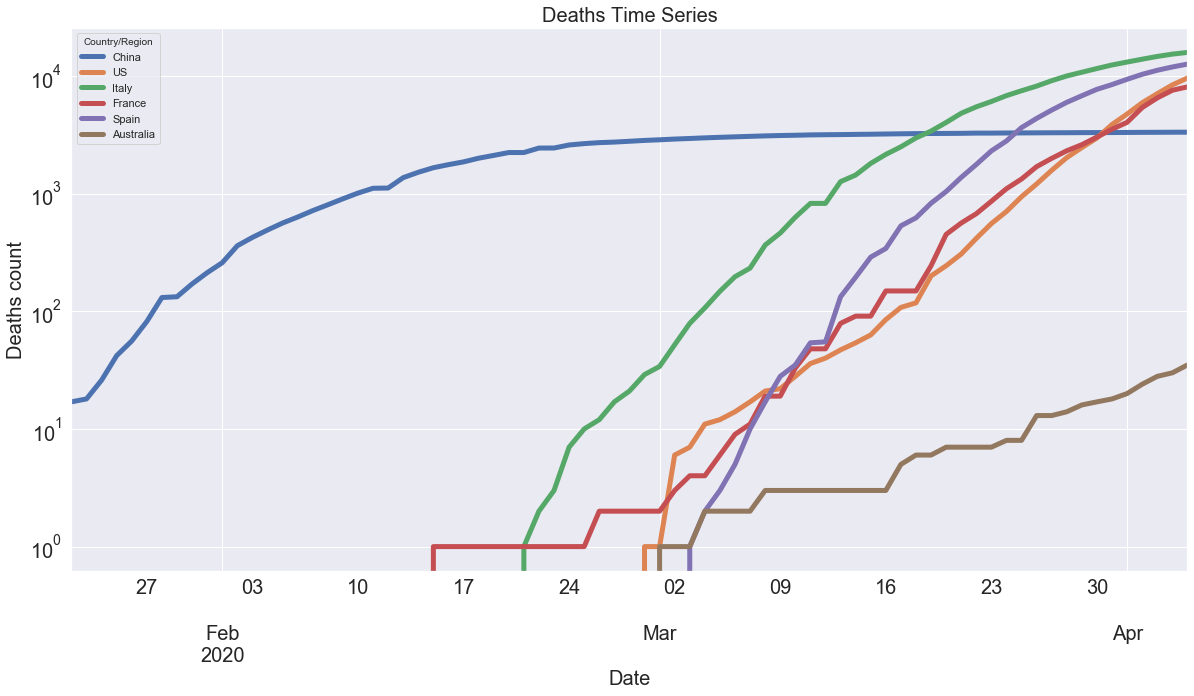

In [20]:
# Plot time series of several countries of interest
deaths_country[poi].plot(figsize=(20,10), linewidth=5, fontsize=20, logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Deaths count', fontsize=20);
plt.title('Deaths Time Series', fontsize=20);

## Aligning growth curves to start with day of number of known deaths = 25

To compare what's happening in different countries, we can align each countries growth curves to all start on the day when the number of known deaths = 25, such as reported in the first figure [here](https://www.nytimes.com/interactive/2020/03/21/upshot/coronavirus-deaths-by-country.html).
To achieve this, first off, let's set set all values less than 25 to NaN so that the associated data points don't get plotted at all when we visualize the data:

In [21]:
# Loop over columns & set values < 25 to None
for col in deaths_country.columns:
    deaths_country.loc[(deaths_country[col] < 25),col] = None

# Check out tail
deaths_country.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
2020-04-01,NaN,NaN,58.0,NaN,NaN,NaN,28.0,NaN,NaN,146.0,...,NaN,2357.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02,NaN,NaN,86.0,NaN,NaN,NaN,36.0,NaN,NaN,158.0,...,NaN,2926.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,NaN,NaN,105.0,NaN,NaN,NaN,39.0,NaN,28.0,168.0,...,NaN,3611.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-04,NaN,NaN,130.0,NaN,NaN,NaN,43.0,NaN,30.0,186.0,...,NaN,4320.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-05,NaN,NaN,152.0,NaN,NaN,NaN,44.0,NaN,35.0,204.0,...,NaN,4943.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let's plot as above to make sure we see what we think we should see:

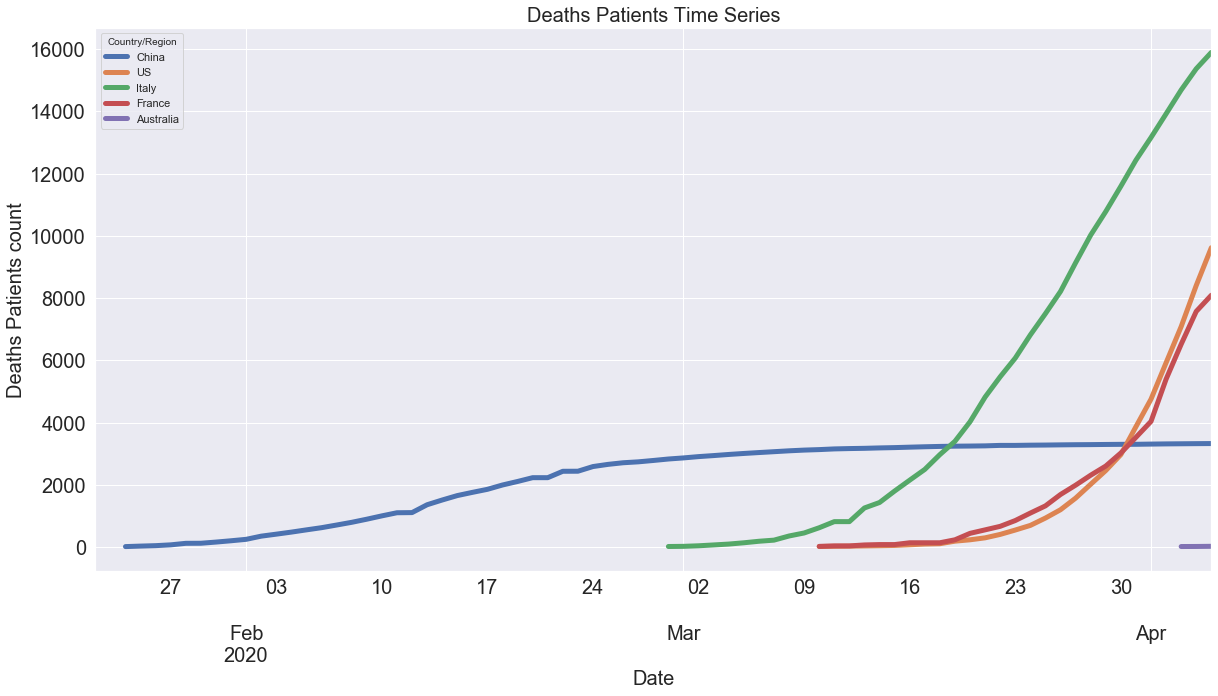

In [22]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Australia']
deaths_country[poi].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Deaths Patients Time Series', fontsize=20);

The countries that have seen less than 25 total deaths will have columns of all NaNs now so let's drop these and then see how many columns we have left:

In [23]:
# Drop columns that are all NaNs (i.e. countries that haven't yet reached 25 deaths)
deaths_country.dropna(axis=1, how='all', inplace=True)
deaths_country.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75 entries, 2020-01-22 to 2020-04-05
Data columns (total 54 columns):
Algeria               11 non-null float64
Argentina             6 non-null float64
Australia             3 non-null float64
Austria               13 non-null float64
Belgium               17 non-null float64
Brazil                15 non-null float64
Canada                14 non-null float64
Chile                 2 non-null float64
China                 73 non-null float64
Colombia              3 non-null float64
Czechia               6 non-null float64
Denmark               13 non-null float64
Dominican Republic    9 non-null float64
Ecuador               13 non-null float64
Egypt                 10 non-null float64
Finland               2 non-null float64
France                27 non-null float64
Germany               19 non-null float64
Greece                11 non-null float64
Hungary               3 non-null float64
India                 8 non-null float64
Indo

As we're going to align the countries from the day they first had at least 25 deaths, we won't need the DateTimeIndex. In fact, we won't need the date at all. So we can 
- Reset the Index, which will give us an ordinal index (which turns the date into a regular column) and
- Drop the date column (which will be called 'index) after the reset.

In [24]:
# sort index, drop date column
deaths_country = deaths_country.reset_index().drop(['index'], axis=1)
deaths_country.head()

Country/Region,Algeria,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Colombia,...,Saudi Arabia,Serbia,Slovenia,Spain,Sweden,Switzerland,Turkey,US,Ukraine,United Kingdom
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now it's time to shift each column so that the first entry is the first NaN value that it contains! To do this, we can use the `shift()` method on each column. How much do we shift each column, though? The magnitude of the shift is given by how many NaNs there are at the start of the column, which we can retrieve using the `first_valid_index()` method on the column **but** we want to shift **up**, which is negative in direction (by convention and perhaps intuition). SO let's do it.

In [25]:
# shift
for col in deaths_country.columns:
    deaths_country[col] = deaths_country[col].shift(-deaths_country[col].first_valid_index())
# check out head
deaths_country.head()

Country/Region,Algeria,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Colombia,...,Saudi Arabia,Serbia,Slovenia,Spain,Sweden,Switzerland,Turkey,US,Ukraine,United Kingdom
0,25.0,27.0,28.0,28.0,37.0,25.0,25.0,27.0,26.0,25.0,...,25.0,28.0,28.0,28.0,25.0,27.0,30.0,28.0,27.0,56.0
1,26.0,28.0,30.0,30.0,67.0,34.0,26.0,34.0,42.0,32.0,...,29.0,31.0,NaN,35.0,36.0,28.0,37.0,36.0,32.0,56.0
2,29.0,36.0,35.0,49.0,75.0,46.0,30.0,NaN,56.0,35.0,...,34.0,39.0,NaN,54.0,62.0,41.0,44.0,40.0,37.0,72.0
3,31.0,39.0,NaN,58.0,88.0,59.0,38.0,NaN,82.0,NaN,...,NaN,44.0,NaN,55.0,77.0,54.0,59.0,47.0,NaN,138.0
4,35.0,43.0,NaN,68.0,122.0,77.0,54.0,NaN,131.0,NaN,...,NaN,51.0,NaN,133.0,105.0,75.0,75.0,54.0,NaN,178.0


**Side note:** instead of looping over columns, we could have applied a lambda function to the columns of the dataframe, as follows:

In [26]:
# shift using lambda function
#deaths_country = deaths_country.apply(lambda x: x.shift(-x.first_valid_index()))

Now we get to plot our time series, first with linear axes, then semi-log:

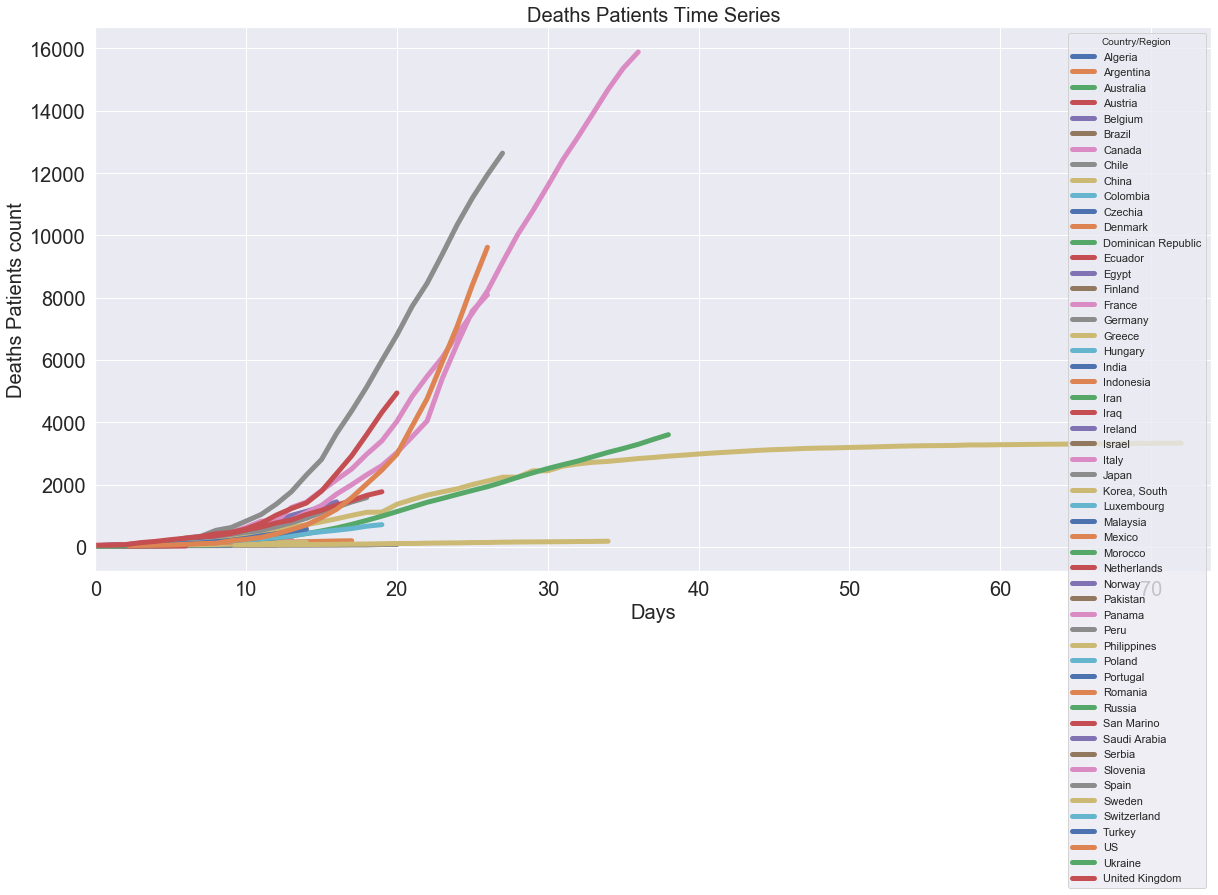

In [27]:
# Plot time series 
deaths_country.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Deaths Patients Time Series', fontsize=20);

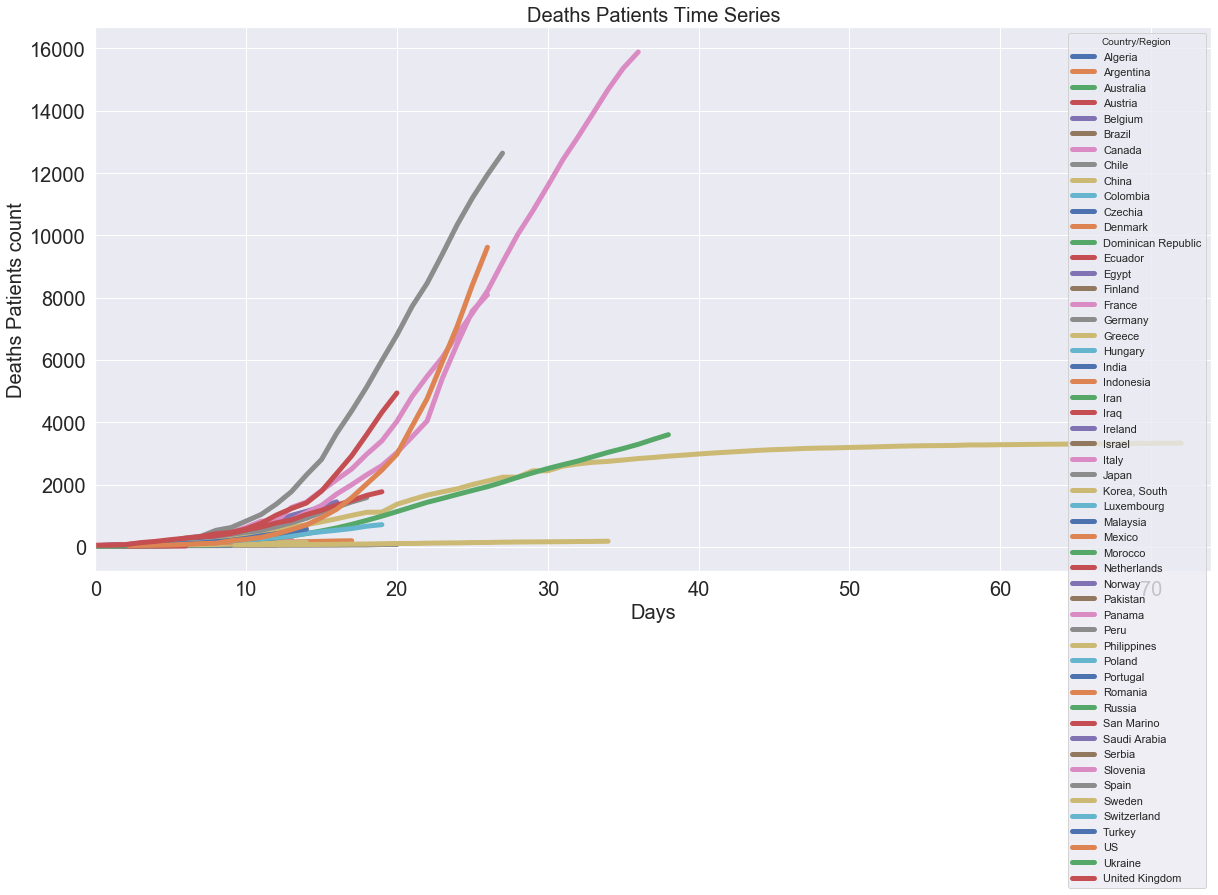

In [28]:
# Plot semi log time series 
deaths_country.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Deaths Patients Time Series', fontsize=20);

## Plotting number of recovered people

The third dataset in the Hopkins repository is the number of recovered. We want to do similar data wrangling as in the two cases above so we *could* copy and paste our code again *but*, as the old saying goes, if you write the same code three times, it's time to write a function.

In [29]:
# Function for grouping countries by region
def group_by_country(raw_data):
    """Returns data for countries indexed by date"""
    # Group by
    data = raw_data.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
    # Transpose
    data = data.transpose()
    # Set index as DateTimeIndex
    datetime_index = pd.DatetimeIndex(data.index)
    data.set_index(datetime_index, inplace=True)
    return data

In [30]:
# Function to align growth curves
def align_curves(data, min_val):
    """Align growth curves  to start on the day when the number of known deaths = min_val"""
    # Loop over columns & set values < min_val to None
    for col in data.columns:
        data.loc[(data[col] < min_val),col] = None
    # Drop columns with all NaNs
    data.dropna(axis=1, how='all', inplace=True)
    # Reset index, drop date
    data = data.reset_index().drop(['index'], axis=1)
    # Shift each column to begin with first valid index
    for col in data.columns:
        data[col] = data[col].shift(-data[col].first_valid_index())
    return data

In [31]:
# Function to plot time series
def plot_time_series(df, plot_title, x_label, y_label, logy=False):
    """Plot time series and make looks a bit nice"""
    df.plot(figsize=(20,10), linewidth=5, fontsize=20, logy=logy)
    plt.xlabel(x_label, fontsize=20);
    plt.ylabel(y_label, fontsize=20);
    plt.title(plot_title, fontsize=20);

For a sanity check, let's see these functions at work on the 'number of deaths' data:

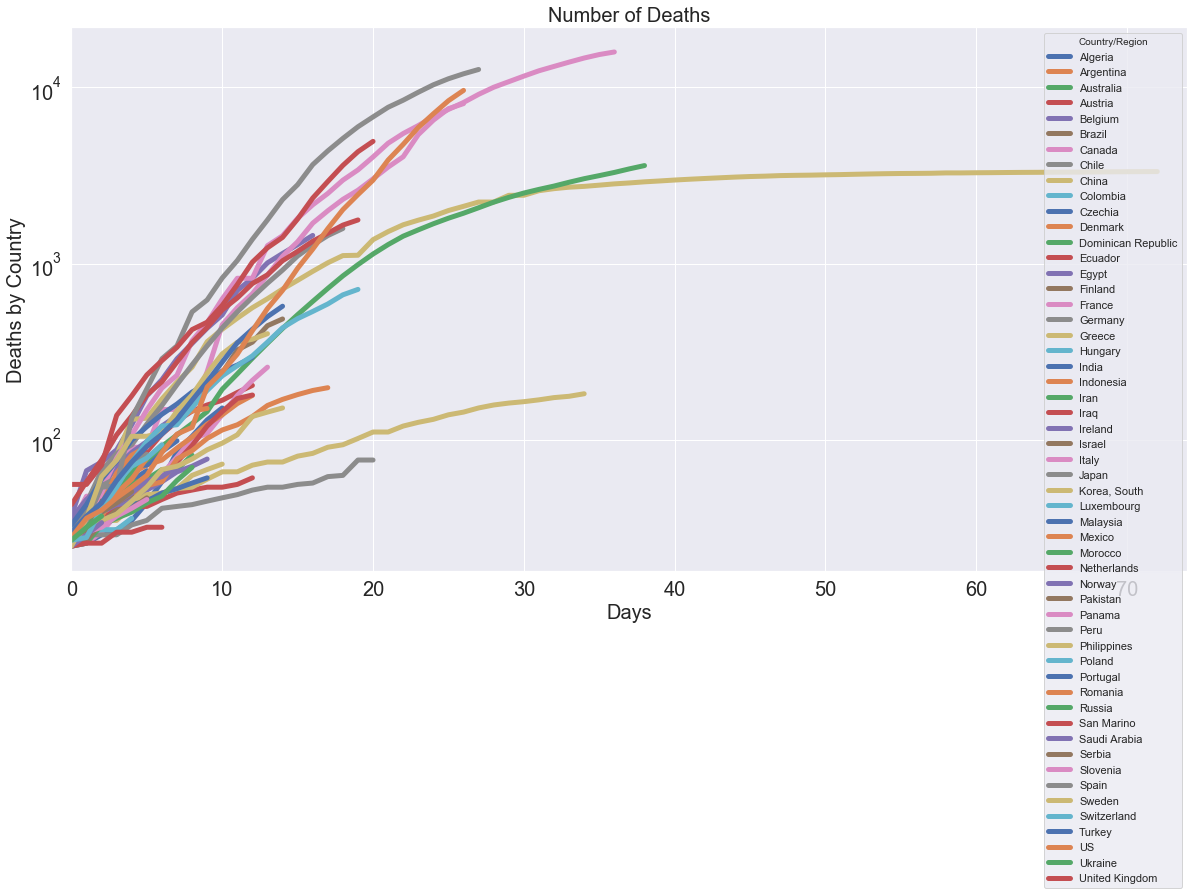

In [32]:
death_country = group_by_country(raw_data_deaths)
death_country = align_curves(death_country, min_val=25)
plot_time_series(death_country, 'Number of Deaths', 'Days', 'Deaths by Country', logy=True)

Ok good. Now let's check out our functions in action on the recovered patients data:

In [33]:
# group by country and check out tail
recovered_country = group_by_country(raw_data_recovered)
recovered_country.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
2020-04-01,5,67,61,10,1,0,248,31,422,1436,...,61,179,41,12,41,63,18,0,0,0
2020-04-02,10,76,61,10,1,0,256,33,520,1749,...,96,192,62,25,43,75,18,0,0,0
2020-04-03,10,89,62,16,1,0,266,43,649,2022,...,108,208,68,25,52,85,21,0,2,0
2020-04-04,10,99,90,21,2,0,279,43,701,2507,...,125,215,93,25,52,90,21,0,2,0
2020-04-05,15,104,90,26,2,0,280,57,757,2998,...,144,229,93,30,52,90,25,0,3,0


In [34]:
# align curves and check out head
recovered_country = align_curves(recovered_country, min_val=25)
recovered_country.head()

Country/Region,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,...,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza
0,31.0,32.0,26.0,52.0,28.0,26.0,112.0,26.0,35.0,25.0,...,26.0,105.0,25.0,26.0,53.0,41.0,25.0,31.0,25.0,25.0
1,31.0,32.0,NaN,52.0,30.0,26.0,225.0,26.0,35.0,25.0,...,26.0,121.0,28.0,31.0,67.0,41.0,25.0,39.0,55.0,NaN
2,33.0,32.0,NaN,63.0,30.0,26.0,225.0,26.0,44.0,25.0,...,42.0,147.0,NaN,31.0,67.0,62.0,25.0,39.0,58.0,NaN
3,44.0,65.0,NaN,72.0,30.0,88.0,479.0,26.0,44.0,26.0,...,70.0,176.0,NaN,38.0,67.0,68.0,30.0,39.0,63.0,NaN
4,52.0,65.0,NaN,72.0,30.0,88.0,636.0,32.0,60.0,30.0,...,105.0,178.0,NaN,38.0,67.0,93.0,NaN,39.0,75.0,NaN


Plot time series:

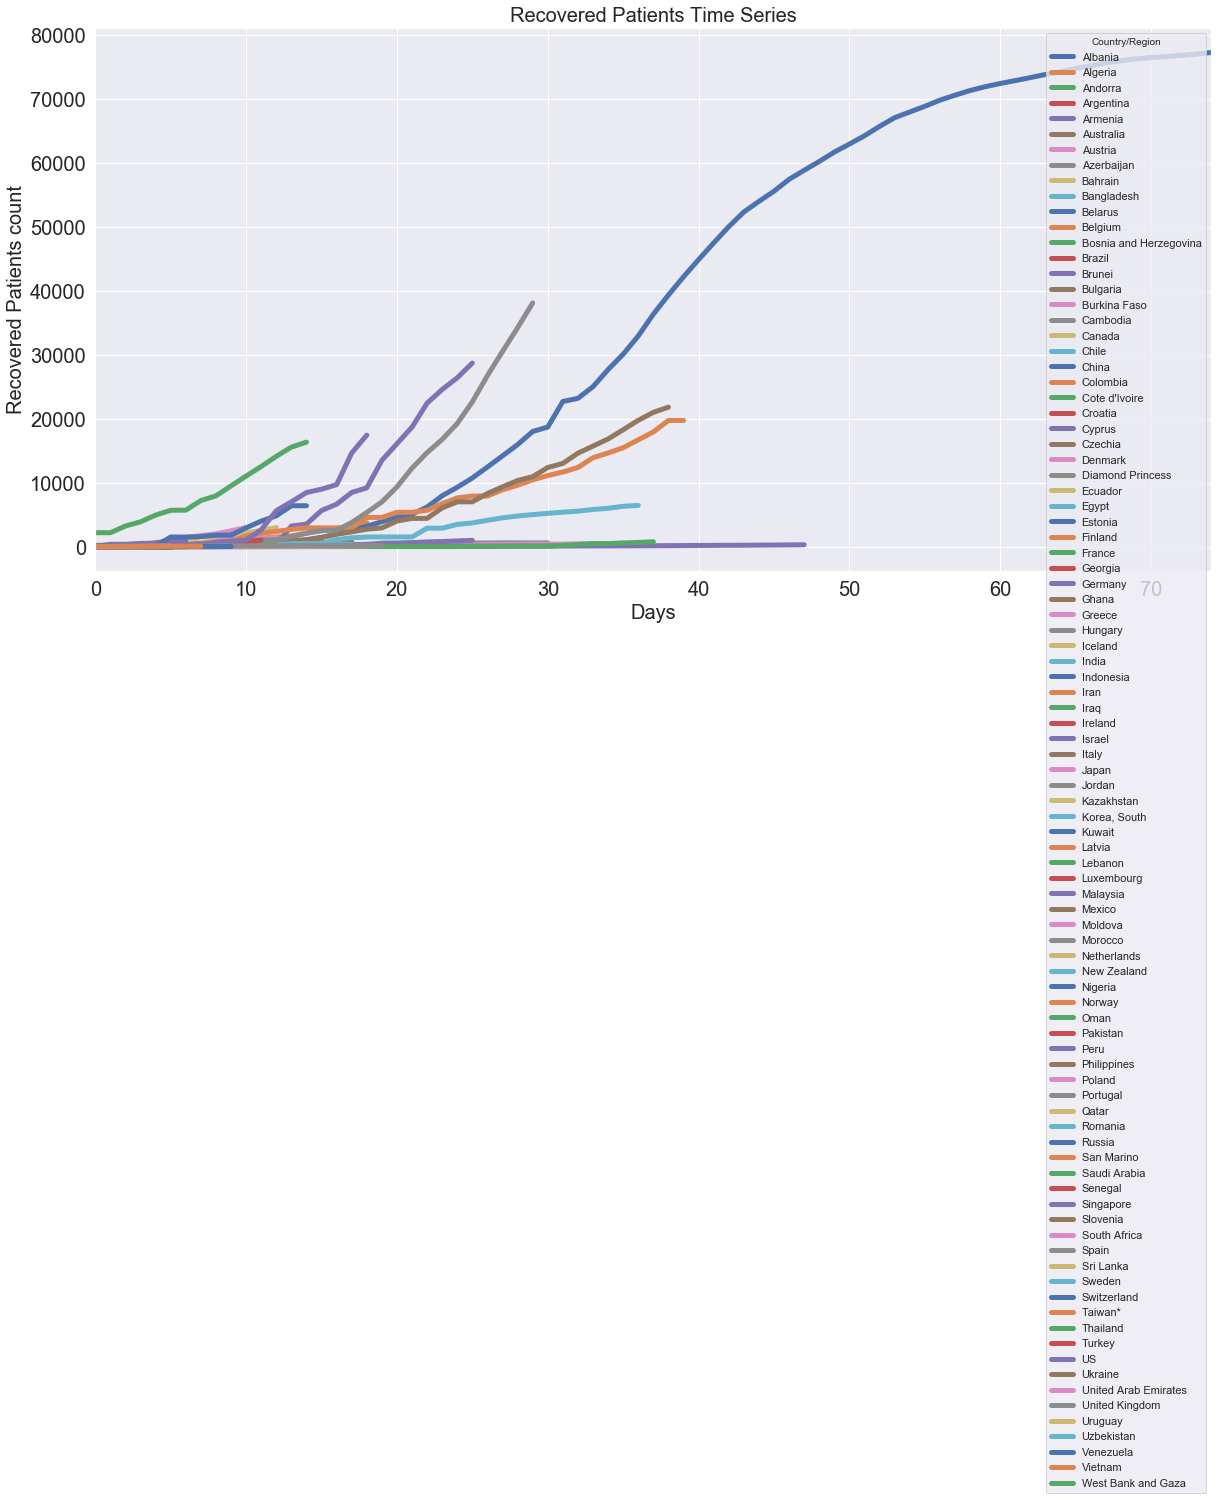

In [35]:
plot_time_series(recovered_country, 'Recovered Patients Time Series', 'Days', 'Recovered Patients count')

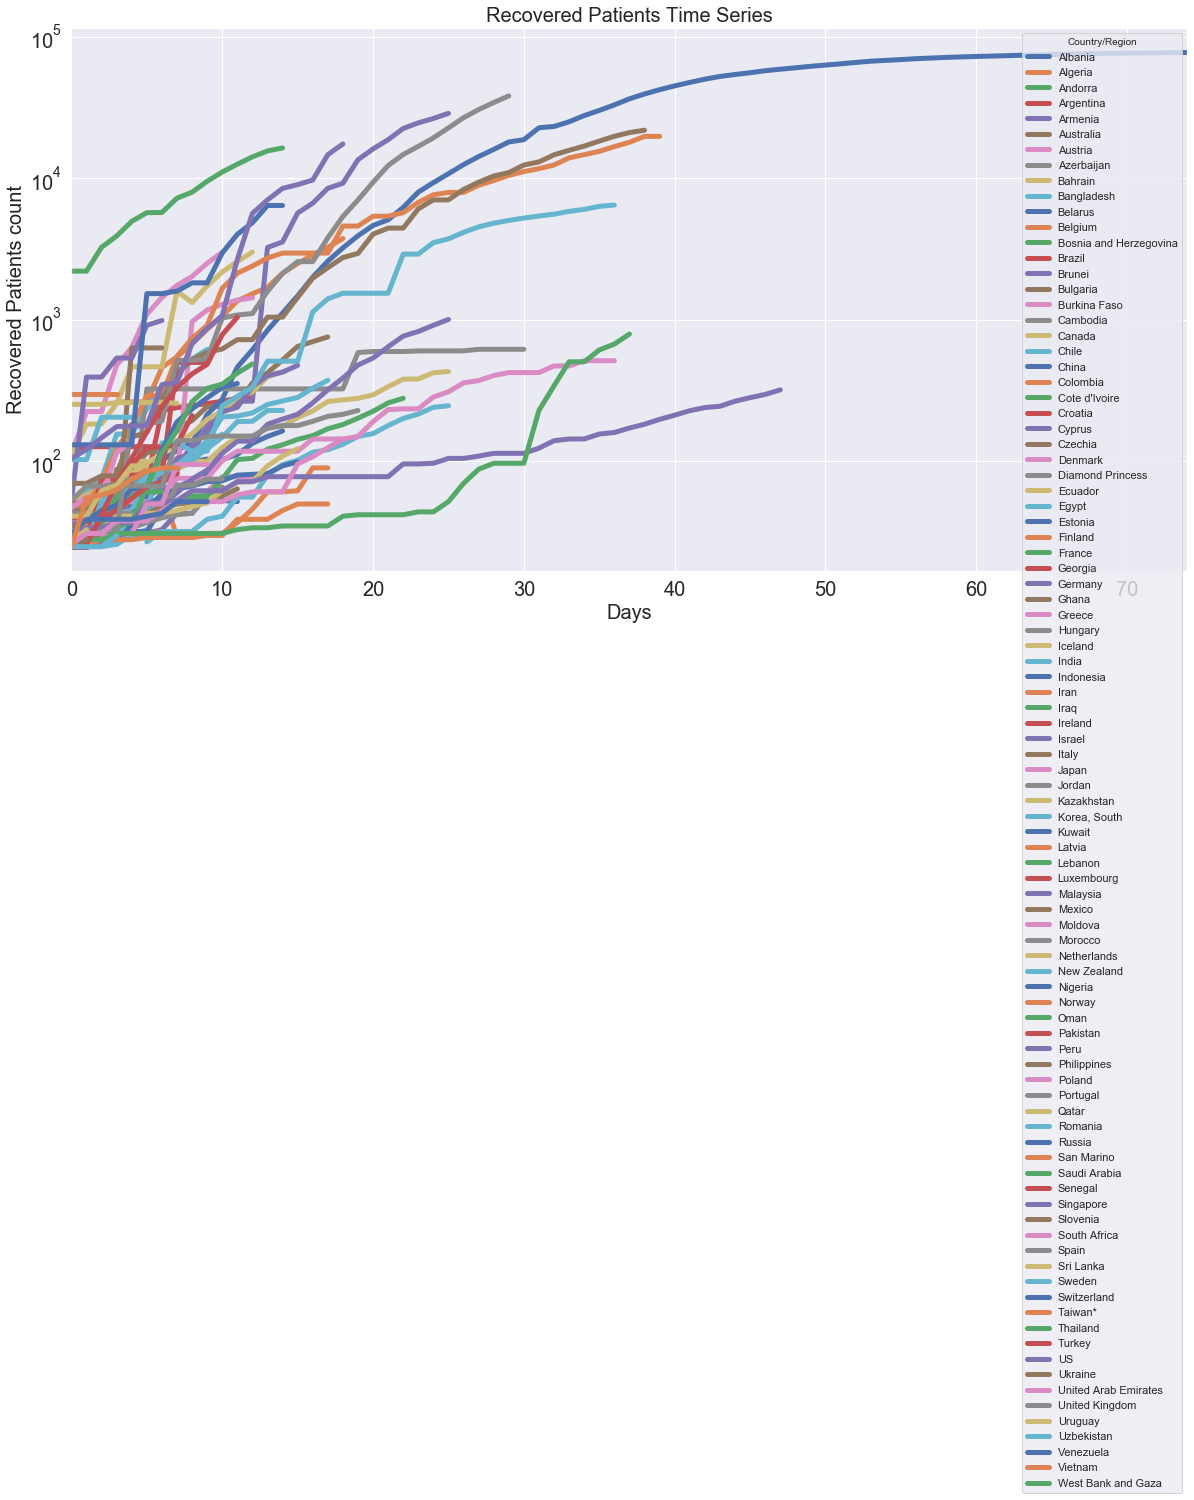

In [36]:
plot_time_series(recovered_country, 'Recovered Patients Time Series', 'Days', 'Recovered Patients count', True)

## Interactive plots with altair

We're now going to build some interactive data visualizations. I was recently inspired by [this one in the NYTimes](https://www.nytimes.com/interactive/2020/03/21/upshot/coronavirus-deaths-by-country.html), a chart of confirmed number of deaths by country for places with at least 25 deaths, similar to ours above, but with cool hover tools. Go check it out. [This one](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html) is also interesting.

We're going to use a tool called [Altair](https://altair-viz.github.io/). I like Altair for several reasons, including precisely what they state on their website:

> With Altair, you can spend more time understanding your data and its meaning. Altair’s API is simple, friendly and consistent and built on top of the powerful [Vega-Lite](https://vega.github.io/vega-lite/) visualization grammar. This elegant simplicity produces beautiful and effective visualizations with a minimal amount of code.

Before jumping into Altair, let's reshape our `deaths_country` dataset. Notice that it's currently in **wide data format**, with a column for each country and a row for each "day" (where day 1 is the first day with over 25 confirmed deaths). This worked with the `pandas` plotting API for reasons discussed above.

In [37]:
# Look at head
deaths_country.head()

Country/Region,Algeria,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Colombia,...,Saudi Arabia,Serbia,Slovenia,Spain,Sweden,Switzerland,Turkey,US,Ukraine,United Kingdom
0,25.0,27.0,28.0,28.0,37.0,25.0,25.0,27.0,26.0,25.0,...,25.0,28.0,28.0,28.0,25.0,27.0,30.0,28.0,27.0,56.0
1,26.0,28.0,30.0,30.0,67.0,34.0,26.0,34.0,42.0,32.0,...,29.0,31.0,NaN,35.0,36.0,28.0,37.0,36.0,32.0,56.0
2,29.0,36.0,35.0,49.0,75.0,46.0,30.0,NaN,56.0,35.0,...,34.0,39.0,NaN,54.0,62.0,41.0,44.0,40.0,37.0,72.0
3,31.0,39.0,NaN,58.0,88.0,59.0,38.0,NaN,82.0,NaN,...,NaN,44.0,NaN,55.0,77.0,54.0,59.0,47.0,NaN,138.0
4,35.0,43.0,NaN,68.0,122.0,77.0,54.0,NaN,131.0,NaN,...,NaN,51.0,NaN,133.0,105.0,75.0,75.0,54.0,NaN,178.0


For Altair, we'll want to convert the data into **long data format**. What this will do essentially have a row for each country/day pair so our columns will be 'Day', 'Country', and number of 'Deaths'. We do this using the dataframe method `.melt()` as follows:

In [38]:
# create long data for deaths
deaths_long = deaths_country.reset_index().melt(id_vars='index', value_name='Deaths').rename(columns={'index':'Day'})
deaths_long.head()

,Day,Country/Region,Deaths
0,0,Algeria,25.0
1,1,Algeria,26.0
2,2,Algeria,29.0
3,3,Algeria,31.0
4,4,Algeria,35.0


We'll see the power of having long data when using Altair. Such transformation have been performed for a long time, however it wasn't until 2014 that Hadley Wickham formalized the language in his paper [Tidy data](https://www.researchgate.net/publication/215990669_Tidy_data). Note that Wickham prefers to avoid the terms long and wide because, in his words, 'they are imprecise'. I generally agree but for our purposes here of giving the flavour, they suffice.

Now having transformed our data, let's import Altair and get a sense of its API.

In [39]:
import altair as alt

# altair plot 
alt.Chart(deaths_long).mark_line().encode(
    x='Day',
    y='Deaths',
    color='Country/Region')

alt.Chart(...)

This is pretty cool! And, looking at the simplicity of the code we just wrote, we can see why it was great to have long data: a column for each variable allowed us to explicitly and easily tell Altair what we wanted on each axis and what we wanted for the colour.

As the [Altair documentation (which is great, by the way!) states](https://altair-viz.github.io/getting_started/overview.html),

> The key idea is that you are declaring links between *data columns* and *visual encoding channels*, such as the x-axis, y-axis, color, etc. The rest of the plot details are handled automatically. Building on this declarative plotting idea, a surprising range of simple to sophisticated plots and visualizations can be created using a relatively concise grammar.

We can now customize the code to thicken the line width, to alter the opacity, and to make the chart larger:

In [40]:
# altair plot 
alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x='Day',
    y='Deaths',
    color='Country/Region'
).properties(
    width=800,
    height=650
)

alt.Chart(...)

We can also add a log y-axis. To do this, The long-form, we express the types using the long-form `alt.X('Day',...)`, which is, in the words of the [Altair documentation](https://altair-viz.github.io/user_guide/encoding.html)
> useful when doing more fine-tuned adjustments to the encoding, such as binning, axis and scale properties, or more.

We'll also now add a hover tooltip so that, when we hover our cursor over any point on any of the lines, it will tell us the 'Country', the 'Day', and the number of 'Deaths'.

In [41]:
# altair plot 
alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color='Country/Region',
    tooltip=['Country/Region', 'Day','Deaths']
).properties(
    width=800,
    height=650
)


alt.Chart(...)

How amazing that we could add that useful hoverl tooltip with one line of code `tooltip=['Country/Region', 'Day','Deaths']`, particularly as it adds such information rich interaction to the chart.
One cool aspect of the NYTimes chart was that, when you hovered over a particular curve, it made it stand out against the other. We're going to do something similar here: in the resulting chart, when you click on a curve, the others turn grey.

**Note:** When first attempting to build this chart, I discovered [here](https://github.com/altair-viz/altair/issues/1552) that "ultiple conditional values in one encoding are not allowed by the Vega-Lite spec," which is what Altair uses! For this reason, we build the chart, then an overlay, and then combine them.

In [42]:
# Selection tool
selection = alt.selection_single(fields=['Country/Region'])
# Color change when clicked
color = alt.condition(selection,
                    alt.Color('Country/Region:N'),
                    alt.value('lightgray'))


# Base altair plot 
base = alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color='Country/Region',
    tooltip=['Country/Region', 'Day','Deaths']
).properties(
    width=800,
    height=650
)

# Chart
chart = base.encode(
  color=alt.condition(selection, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
  selection
)

# Overlay
overlay = base.encode(
    color='Country/Region',
  opacity=alt.value(0.5),
  tooltip=['Country/Region:N', 'Name:N']
).transform_filter(
  selection
)

# Sum em up!
chart + overlay

alt.LayerChart(...)